<a href="https://colab.research.google.com/github/Hamza1122/ML-Annomly-detection/blob/main/Project_2_Omar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**, 
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**



Please fill out the following:


*   Name: 
*   Student Number: 

##**Part 1: Getting started** [4 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?

  There are 284807 rows.
* What features in the dataset are present aside from the 28 main features?

  Besides 28 main features there are other feature like Time, Amount and Class  features.
* Which column contains the targets?
  
  The column Class contains the targets values.

* To what do the target values correspond?

  The target values are [0,1].

In [1]:
!pip install wget

In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
df.shape[0] #rows size


284807

In [6]:
df.head(5) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:

df['Class'].unique() #target column values

array([0, 1])

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class?
  
  Below is the code "df.value_counts(normalize=True) * 100". You can see the percentage results written over there.
* Is this data considered balanced or unbalanced? Why is this the case?
  
  Yes, dataset is completely unabalanced. The reason is that there are 284315 values are "0" and 492 are "1" values.
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?

 The balanced class is very important because in the imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.
  If the training set were to be imbalanced, and if the uniform distribution assumption were to still hold, the probability that the kNN of any random query point will belong to the class with more examples becomes higher



In [8]:
### YOUR CODE HERE ###
from numpy import loadtxt
from numpy import unique

df.value_counts(normalize=True) * 100

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0        0.006320
          -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0

Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V20? Make sure to only use your training set for this calculation.

 The mean is 0.00043
 
 The std  is 0.770

Use the code below to set up a Gaussian object for V20.

In [9]:
### Split the data  ###
from sklearn.model_selection import train_test_split
y=df['Class']
X=df.drop(['Class'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
mean=X_train['V20'].mean()
std=X_train['V20'].std()
print(mean)
print(std)

0.0004302219382028674
0.7702574561360888


In [10]:
from scipy import stats

norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V20 ### 
    scale =std  ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V20 ### 

)

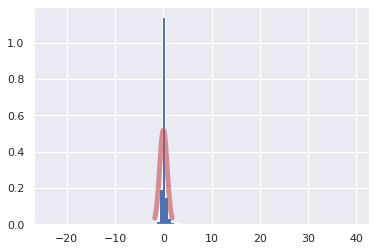

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V20'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

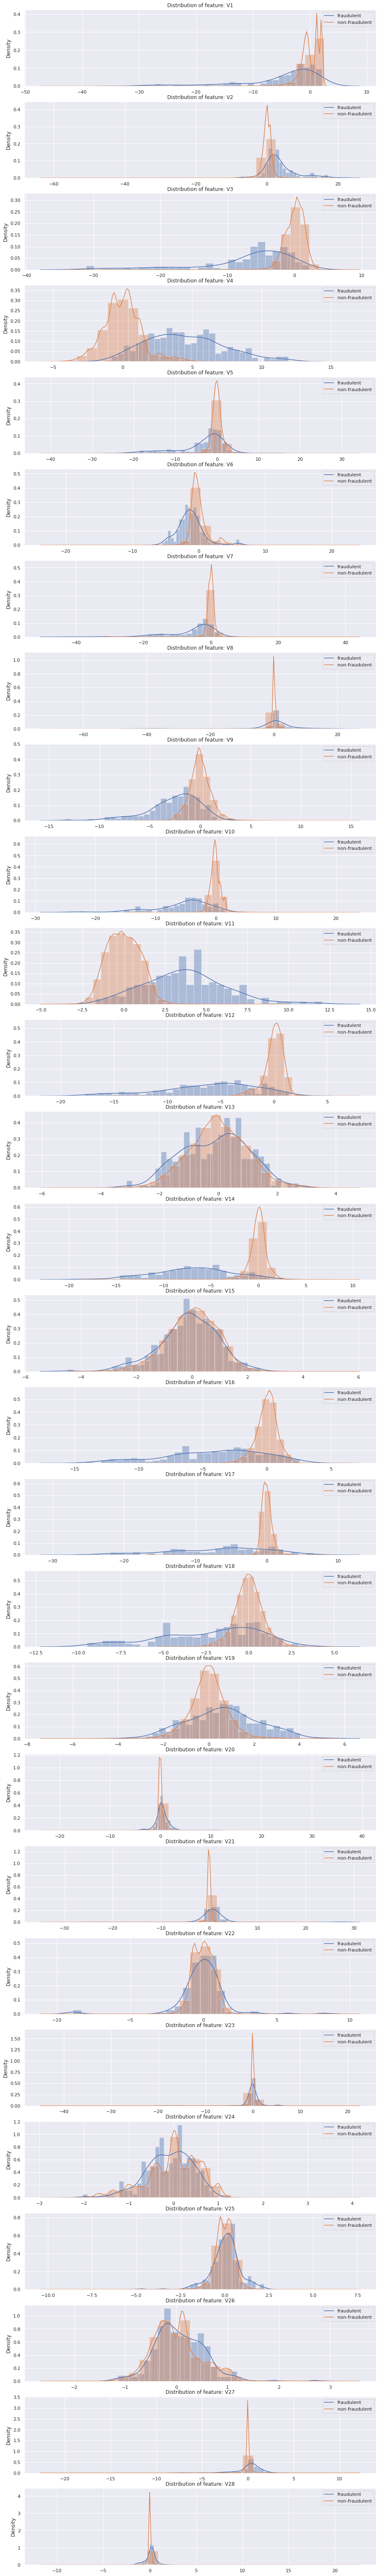

In [12]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model.


 All the graphs have higher number of non-fraudulent class with respect of each feature in a datase


## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  * Fit a Gaussian distribution on a feature of **the full training dataset** (this is unsupervised learning, we don't use the labels) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. **[1]**



Task 2.1

In [13]:
### YOUR CODE HERE ###

from sklearn import mixture
gmix = mixture.GaussianMixture(n_components=1)    
gmix.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Task 2.2

Best Optimize Threshold=-49.589020, G-Mean=0.137


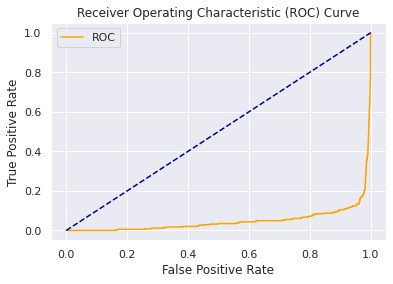

In [14]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

score=gmix.score_samples(X_train)   
fpr, tpr, thresholds = roc_curve(y_train,score)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Optimize Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Task 2.3

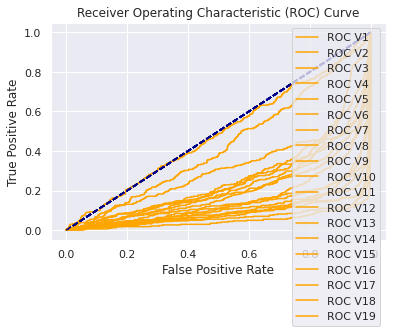

In [15]:
from sklearn.metrics import roc_auc_score

new_gmix = mixture.GaussianMixture(n_components=1)    
dicts = {}
for x in range(1,20):
  v='V'+str(x)
  new_gmix.fit(X_train[[v]])
  score=new_gmix.score_samples(X_train[[v]])   
  best_score=roc_auc_score(y_train,score)
  dicts[v]=best_score
  fpr, tpr, _ = roc_curve(y_train,score)
  plt.plot(fpr, tpr, color='orange', label='ROC ' + v)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  #plt.show()

Task 2.4

In [16]:

max_value = max(dicts.values())  # maximum value
max_keys = [k for k, v in dicts.items() if v == max_value] # getting all keys containing the `maximum`
print(max_value, max_keys)


0.4852355149836033 ['V15']



V15 is best feature, we got on both fraudulent and non fraudulent

Task 2.5

The Best Optimize Threshold=-49.589020

## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).

  * Fit a Gaussian distribution on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  Find an optimal threshold that maximizes the F1 Score in the training set. **[0.5]**
  *  Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance? **[0.5]**


In [17]:
### YOUR CODE HERE ###
x_train=X_train
x_train['Class']=y_train
x_train=x_train.loc[x_train.Class==1]

y_class=x_train['Class']
x_train=x_train.drop(['Class'],axis=1)
print(x_train.shape)
print(y_class.shape)


(345, 30)
(345,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Task 3.1

In [18]:
# supervied gaussian
from sklearn.metrics import roc_auc_score


supervised_gaussian = mixture.GaussianMixture(n_components=1)    
supervised_gaussian.fit(x_train)
X_train=X_train.drop(['Class'],axis=1)

Task 3.2

Best Threshold=-62.199319, G-Mean=0.627


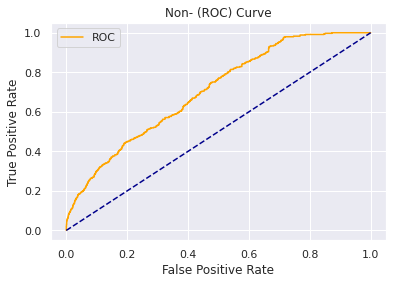

In [19]:

score=supervised_gaussian.score_samples(X_train)   
fpr, tpr, thresholds = roc_curve(y_train,score)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non- (ROC) Curve')
plt.legend()
plt.show()

Task 3.3

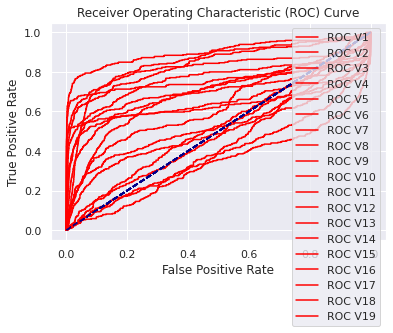

In [20]:
dict_super={}
for x in range(1,20):
  v='V'+str(x)
  supervised_gaussian.fit(x_train[[v]])
  score=supervised_gaussian.score_samples(X_train[[v]])   
  best_score=roc_auc_score(y_train,score,average='micro')
  dict_super[v]=best_score
  fpr, tpr, _ = roc_curve(y_train,score)
  plt.plot(fpr, tpr, color='red', label='ROC ' + v)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')  
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  #plt.show()
  
  

Task 3.4

In [21]:
max_value = max(dict_super.values())  # maximum value
max_keys = [k for k, v in dict_super.items() if v == max_value] # getting all keys containing the `maximum`
print(max_value, max_keys)

0.895135421852884 ['V14']


Part 3.4

V14 is the best feature 

Part 3.5

Optimal Threshod is Threshold=-62.199319

Part 3.6

Comparing with part 2, the model works well on non-fraudulent data than full dataset.

## **Part 4: *Supervised,* Two Gaussians** -- Single feature model with two Gaussian distributions. [3 Marks]
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  *  Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Use the feature that lead to the best AUC in Part 3. **[0.5]**
  * Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively. **[0.5]**
  * Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). **[0.5]**
  * Repeat the steps above for at least two other features. **[1]**

Task 4.1

In [22]:
### YOUR CODE HERE ###

x_train_f=X_train
x_train_f['Class']=y_train
x_train_f=x_train_f.loc[x_train_f.Class==0]

y_class_f=x_train_f['Class']
x_train_f=x_train_f.drop(['Class'],axis=1)

G1 = mixture.GaussianMixture(n_components=1)   
G1.fit(x_train)


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Task 4.2

In [23]:

G2 = mixture.GaussianMixture(n_components=1)    
G2.fit(x_train_f)
X_train=X_train.drop(['Class'],axis=1)

Task 4.3

In [24]:
G1_score=G1.score_samples(X_train)   
G2_score=G2.score_samples(X_train)   

G1_roc=roc_auc_score(y_train,G1_score)
G2_roc=roc_auc_score(y_train,G2_score)
print(G1_roc)
print(G2_roc)



0.7031634223838945
0.04237496514607046


Task 4.4

In [25]:
c=1
if G1_roc < c * G2_roc:
  print('Fraud Transaction')
else:
  print('No Fraud Transaction')  



No Fraud Transaction


Task 4.5

In [26]:
G1_v = mixture.GaussianMixture(n_components=1)    #1.1
G1_v.fit(x_train)

G2 = mixture.GaussianMixture(n_components=1)    #1.1
G2.fit(x_train_f)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
for x in range(1,3):
  v='V'+str(x)
  G1_v = mixture.GaussianMixture(n_components=1)    #1.1
  G2_v = mixture.GaussianMixture(n_components=1)    #1.1
  G1_v.fit(x_train[[v]])
  G2_v.fit(x_train_f[[v]])
  G1_score=G1_v.score_samples(X_train[[v]])   #1.2
  G2_score=G2_v.score_samples(X_train[[v]])   #1.2
  G1_best_score=roc_auc_score(y_train,G1_score,average='micro')
  G2_best_score=roc_auc_score(y_train,G2_score,average='micro')
  print("Feature "+v)
  print("G1 score ",G1_best_score)
  print("G2 score ",G2_best_score)
  #plt.show()

Feature V1
G1 score  0.6143692492836784
G2 score  0.29465036147229695
Feature V2
G1 score  0.6966593022834977
G2 score  0.16198508757921376


## **Part 5: Multivariate and Mixture of Gaussians Distribution** [6 Marks]
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. **Make sure you have at least one model of each group**.
* You can use supervised and/or unsupervised methods. **Make sure you have at least one model of each group**.

It is up to you how to design your model. Try at least 12 different models and report the AUC and best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[6]**

**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [28]:
from sklearn.metrics import f1_score

In [29]:
for x in range(1,4):
   data=mixture.GaussianMixture(n_components=x)
   data.fit(x_train)
   y_pred=data.predict(X_test)
   print("Component "+str(x) +'  F1 score' )
   print(f1_score(y_test, y_pred, average='macro'))
   data=data.score_samples(X_train)
   print('Component '+str(x) +' Non-Fraudulent ROC score ',roc_auc_score(y_train,data,average='micro'))

for x in range(4,8):
   data=mixture.GaussianMixture(n_components=x)
   data.fit(x_train_f)
   y_pred=data.predict(X_test)
   print("Component "+str(x) +'  F1 score' )
   print(f1_score(y_test, y_pred, average='macro'))
   data=data.score_samples(X_train)
   print('Component '+str(x) +' Fraudulent ROC score ',roc_auc_score(y_train,data,average='micro'))


for x in range(8,13):
   data=mixture.GaussianMixture(n_components=x)
   data.fit(X_train)
   y_pred=data.predict(X_test)
   print("Component "+str(x) +'  F1 score' )
   print(f1_score(y_test, y_pred, average='macro'))
   
   data=data.score_samples(X_train)
   print('Component '+str(x) +' Both Classes ROC score ',roc_auc_score(y_train,data,average='micro'))


Component 1  F1 score
0.4995695183877146
Component 1 Non-Fraudulent ROC score  0.7031634223838945
Component 2  F1 score
0.3098636060046184
Component 2 Non-Fraudulent ROC score  0.7819652205662979
Component 3  F1 score
0.018221549638098414
Component 3 Non-Fraudulent ROC score  0.780480124576264
Component 4  F1 score
0.05195012120672309
Component 4 Fraudulent ROC score  0.06106800231949305
Component 5  F1 score
0.13162189371534672
Component 5 Fraudulent ROC score  0.06142929620513256


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Component 6  F1 score
0.05551385846176362
Component 6 Fraudulent ROC score  0.0617139387536446
Component 7  F1 score
0.026332275224268765
Component 7 Fraudulent ROC score  0.06289708993628239
Component 8  F1 score
0.0456593869272115
Component 8 Both Classes ROC score  0.0654567756293897
Component 9  F1 score
0.04028979621373117
Component 9 Both Classes ROC score  0.06442825246238597
Component 10  F1 score
0.004121530049430546
Component 10 Both Classes ROC score  0.06478080783343751
Component 11  F1 score
0.004293139120541481
Component 11 Both Classes ROC score  0.06253299972597473
Component 12  F1 score
0.0027176855399088213
Component 12 Both Classes ROC score  0.0626060100153572


Component 1 with Non-Fraudulent has highest f1 score

## **Part 6: Evaluating performance on test set:** [1 Mark]
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


In [32]:
### YOUR CODE HERE ###
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
data_test=mixture.GaussianMixture(n_components=1)
data_test.fit(X_train)
y_pred=data_test.predict(X_test)
print("F1 Score",f1_score(y_test, y_pred, average='macro'))

precision = precision_score(y_test,y_pred)
print('Precision: ',precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred) 
print('Precision:' ,recall)







F1 Score 0.4995695183877146
Precision:  0.0
Precision: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
